## Create a Decision Tree that can predict the survival of passengers on the Titanic
Make sure not to impose any restrictions on the depth of the tree

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

# for visualisation
import matplotlib.pyplot as plt

%matplotlib inline

__Data dictionary:__ 
- PassengerId: Unique ID of a passenger
- Pclass: ticket class, 1 = 1st/upper, 2 = 2nd/middle, 3 = 3rd/lower
- Age: age in years
- SibSp: # of siblings/spouses aboard the Titanic
- Parch: # of parents/children aboard the Titanic
- Ticket: ticket number
- Fare: Passenger fare
- Cabin: cabin number
- Embarked: Port of embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

### Load datset

In [2]:
# importing the dataset
data = pd.read_csv('titanic.csv')
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
# quick check at data types & null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


_From the above, the dataset is a combination of numeric data and categorical data_ 
1. The 'Embarked' feature has only 2 missing values, these records can be dropped
2. The 'Age' feature has 891-714 = 177 missing values, this can be filled with its mean value
3. The 'Cabin' feature has 891-204 = 687 missing values, which looks like a lot. For this exploratory practise, this series is dropped.
4. The 'passengerId','Name' and 'Ticket' are not needed for the analysis and will be dropped as well.

In [4]:
# drop null data for 'Embarked'
data = data.dropna(subset = ['Embarked'])

# fill 'Age' null values with the mean
data['Age'].fillna(data['Age'].mean(), inplace = True)

# drop 'Cabin' and 'PassengerID' columns
data = data.drop('PassengerId', axis = 1)
data = data.drop('Cabin', axis = 1)
data = data.drop('Name', axis = 1)
data = data.drop('Ticket', axis = 1)


data.info(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


_all the missing values have been processed._

In [5]:
# data preparation, categrical values into interger values, ETC

# For 'Sex' column, set 'male' = 0, 'female' = 1
sex_nums ={'Sex': {'male': 0, 'female': 1}}
data = data.replace(sex_nums)
data['Sex'].value_counts()
# For 'Embarked' column, set 'C'(Cherbourg) = 0, 'Q'(Queenstown) = 1, 'S'(Southampton)= 2
embarked_nums ={'Embarked': {'C': 0, 'Q': 1, 'S': 2}}
data = data.replace(embarked_nums)

# Mapping Fare
data.loc[data['Fare'] <= 7.9, 'Fare'] = 0
data.loc[(data['Fare'] > 7.9) & (data['Fare'] <= 14.5), 'Fare'] = 1
data.loc[(data['Fare'] > 14.5) & (data['Fare'] <= 31), 'Fare']   = 2
data.loc[ data['Fare'] > 31, 'Fare'] = 3
data['Fare'] = data['Fare'].astype(int)

# Mapping Age
data.loc[data['Age'] <= 16, 'Age'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age']   = 2
data.loc[ data['Age'] > 48, 'Age'] = 3
data['Age'] = data['Age'].astype(int)


data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,0,2
1,1,1,1,2,1,0,3,0
2,1,3,1,1,0,0,1,2
3,1,1,1,2,1,0,3,2
4,0,3,0,2,0,0,1,2


### Select relevant variables from the data and split the data into a training, development and test set

<AxesSubplot: >

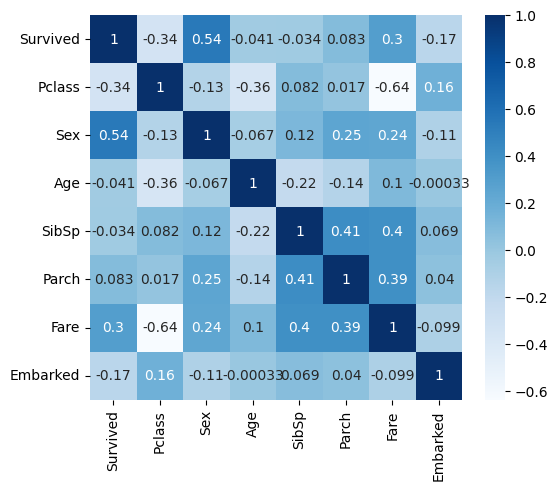

In [6]:
plt.figure(figsize=(6,5))
sns.heatmap(data.corr(), annot=True, cmap='Blues')

_From the heatmap, 'Sex' shows the highest correlations with 'Survived'._

In [7]:
# split the data
x = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
r=4
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=r)
x_train, x_dev, y_train, y_dev = train_test_split(x_train, y_train, test_size=0.2, random_state=r)
print ("Training data:",x_train.shape, y_train.shape)
print ("Development data:",x_dev.shape, y_dev.shape)
print ("Test data:",x_test.shape, y_test.shape)

Training data: (568, 7) (568,)
Development data: (143, 7) (143,)
Test data: (178, 7) (178,)


### Train a decision tree and make a plot of it

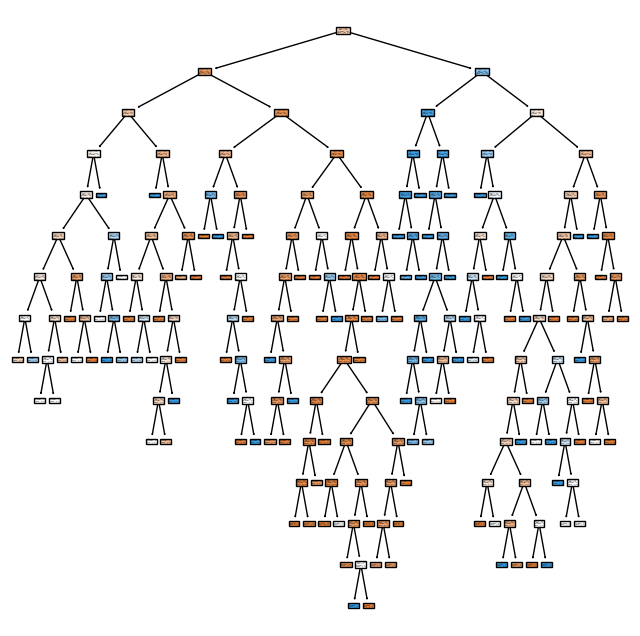

In [8]:
# training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None, random_state=r)
unpruned.fit(x_train, y_train)

# plot the model
fig = plt.figure(figsize=(8,8))
_=tree.plot_tree(unpruned, filled=True)

### Compute your model's accuracy on the development set

In [9]:
print('Accuracy with development set:', unpruned.score(x_dev, y_dev))

Accuracy with development set: 0.7762237762237763


### Try building models with different values of the max_depth[2-10]. 
At each step, create a plot of your tree and store the accuracies on both the training and development data

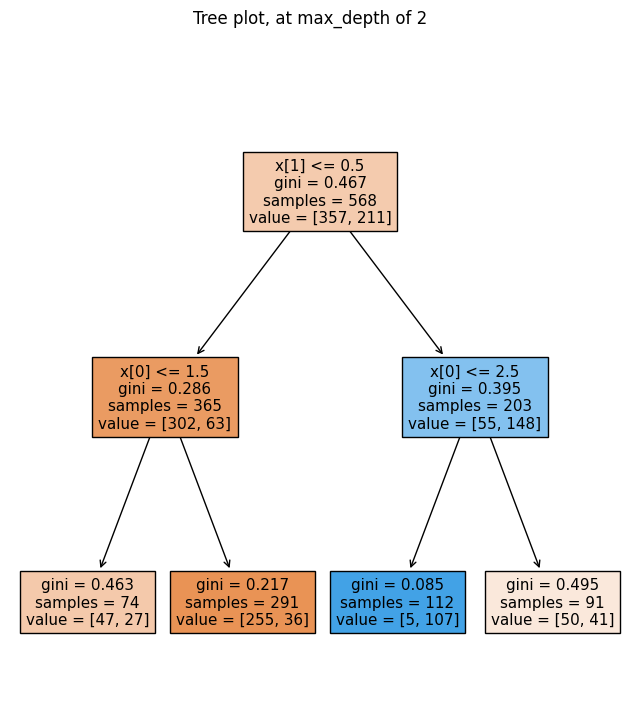

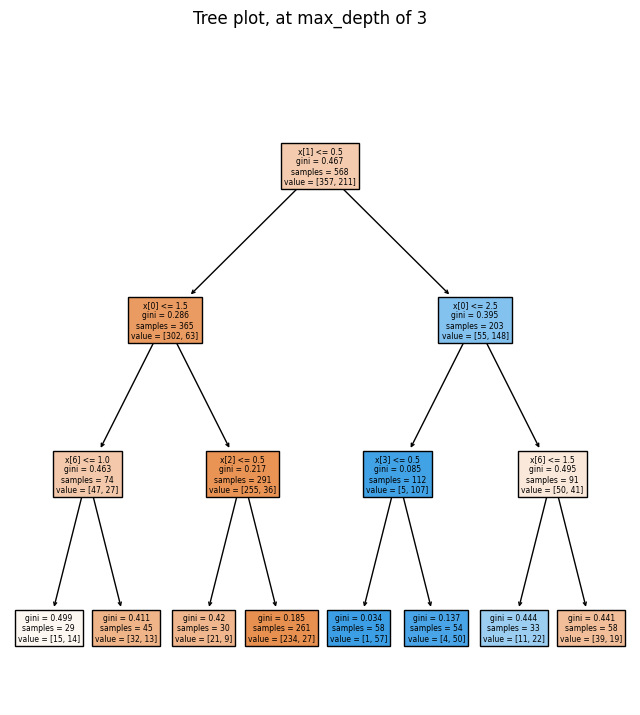

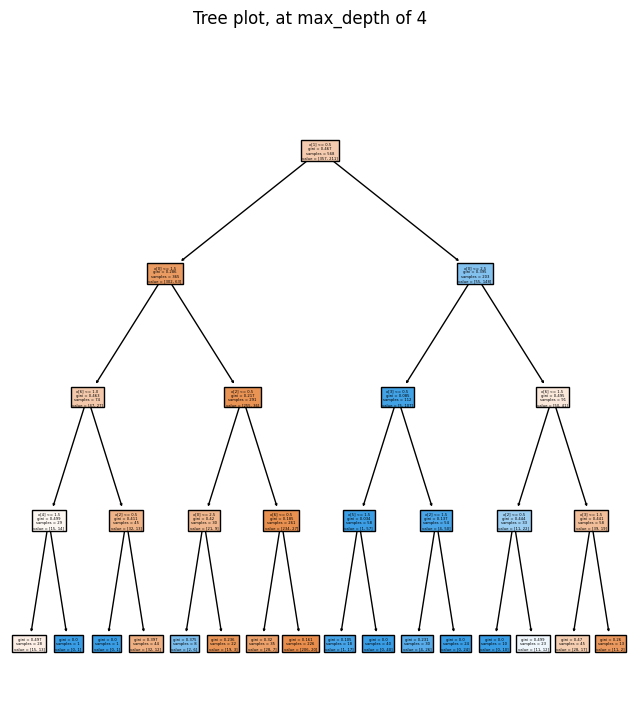

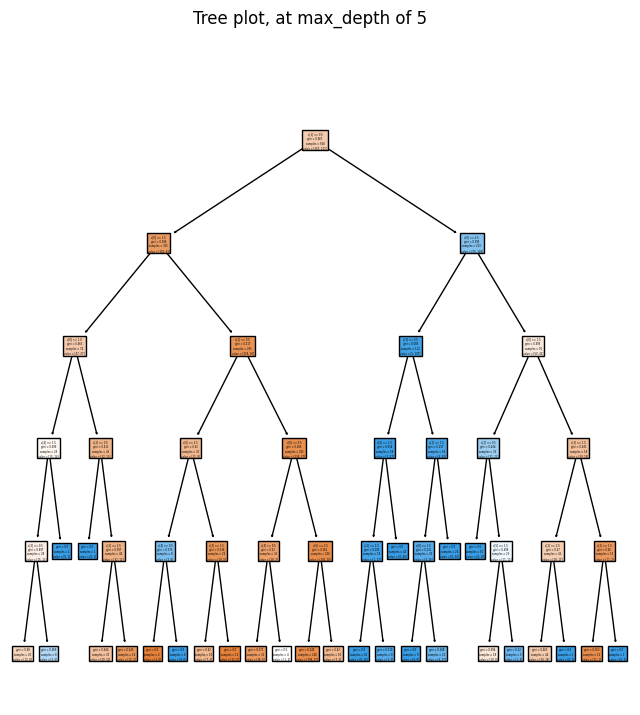

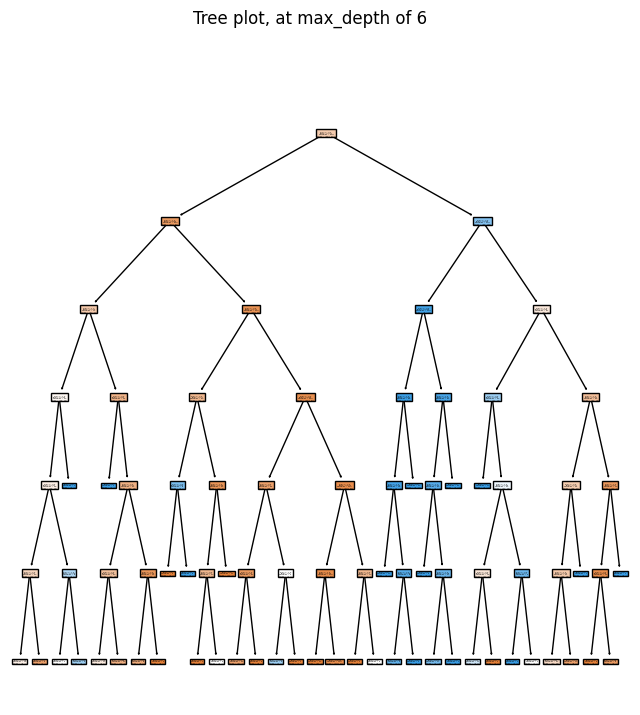

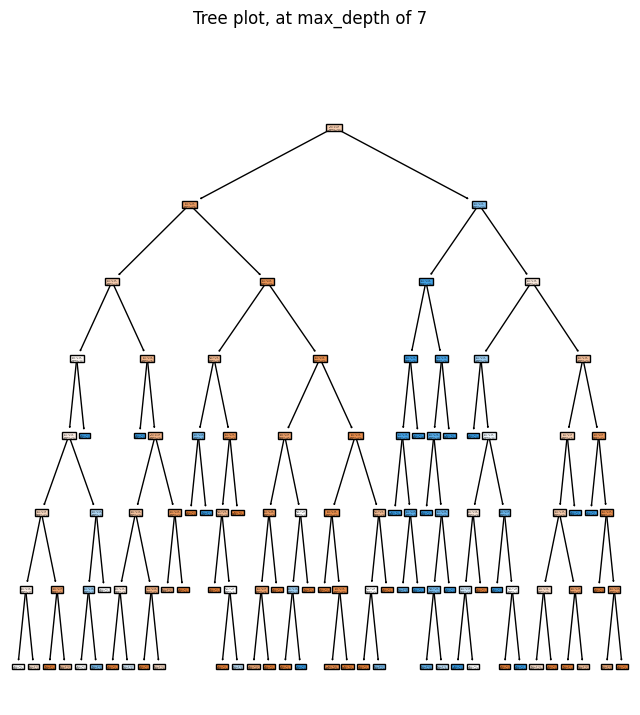

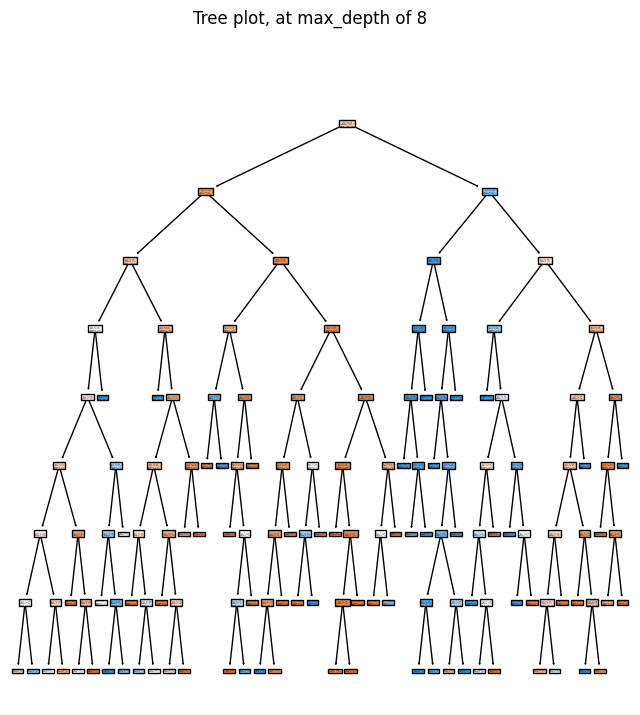

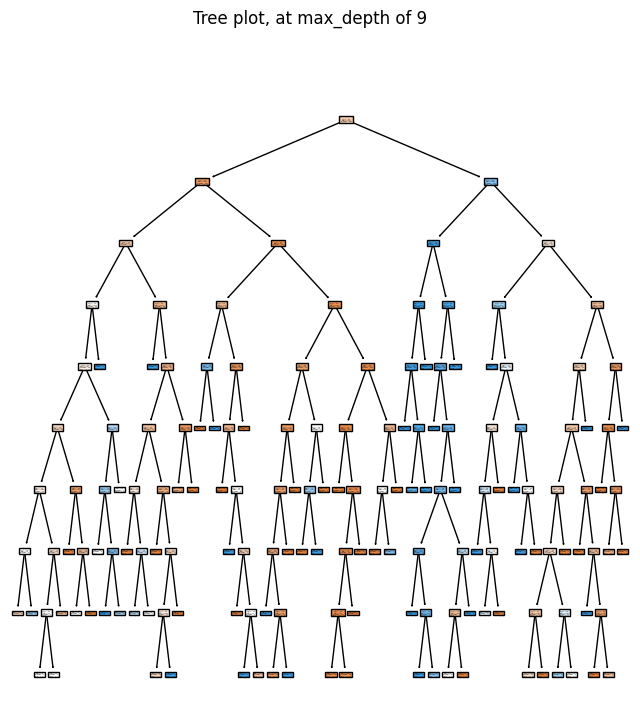

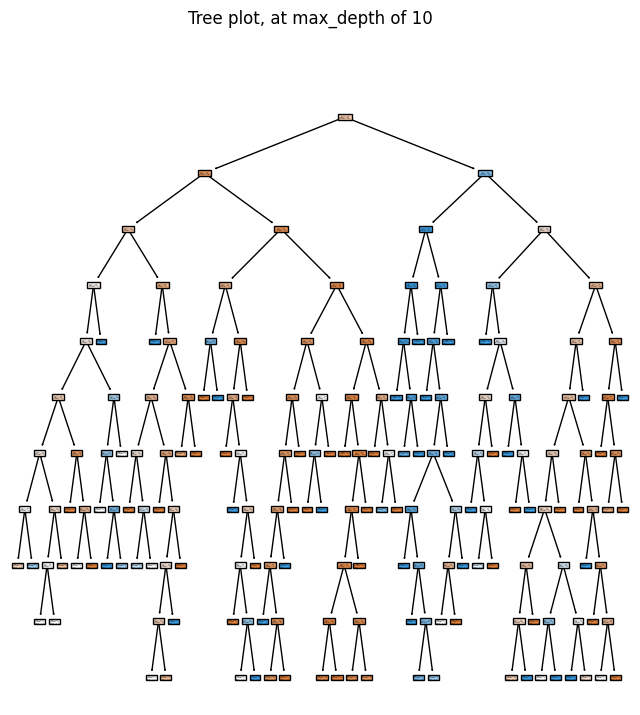

In [10]:
p_depths = range(2, 11)
train_scores = []
dev_scores=[]
for d in p_depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=r)
    clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    train_scores.append(train_score)
    dev_score = clf.score(x_dev, y_dev)
    dev_scores.append(dev_score)
    # plot the model
    fig = plt.figure(figsize=(8,8))
    _=tree.plot_tree(clf, filled=True)
    plt.suptitle(f'Tree plot, at max_depth of {d}')
 



### Plot a line of training accuracies and another of development accuracies in the same graph
Write down what shape the lines have and what this shape means 

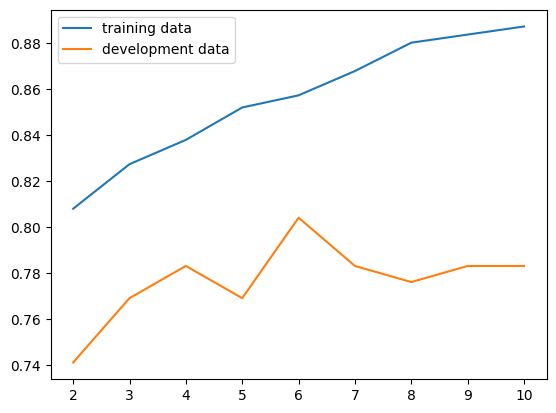

In [11]:
# plot graph for accuracy on training data and on development data
fig, ax = plt.subplots()
ax.plot(p_depths, train_scores, label='training data')
ax.plot(p_depths, dev_scores, label='development data')

ax.xaxis.set_ticks(p_depths)
plt.legend()
plt.show()


### Pick an optinum value for the max_depth parameter and train your final decision tree using this parameter

_from above model fitting, it seems that the model has the best accuracy on development data when max_depth is 6. When max_depth continues to increase, accuracy for training data keep increasing, however, this might be overfitting. As accuracy on development data started to drop._

In [12]:
# fitting choose decision tree 
best_depth = 6
print('Best performance reached at depth of 6.')

pruned = DecisionTreeClassifier(max_depth=best_depth)
pruned.fit(x_train,y_train)

Best performance reached at depth of 6.


DecisionTreeClassifier(max_depth=6)

### Report the accuracy of your final model on the test data

In [13]:
# accuracy on the test data
print('Accuracy on the test data is ', pruned.score(x_test, y_test))

Accuracy on the test data is  0.7808988764044944
